In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file_participation = "participation.xlsx"
file_enrollment = 'enrollment.xlsx'

excel_participation = pd.ExcelFile(file_participation)
excel_enrollment = pd.ExcelFile(file_enrollment)

participation = {}
for year in excel_participation.sheet_names: #creates dicts to store each pandas sheet for year ex. participation[2007] gives 2007
    participation[year] = pd.read_excel(file_participation, sheet_name=year, index_col=1, header=None, names=['School', 'Takers', 'Tests', '1', '2', '3', '4', '5+'])
    participation[year].index.names = ['ID']

enrollment = {} 
for year in excel_enrollment.sheet_names:##creates dicts to store each pandas sheet for year
    enrollment[year] = pd.read_excel(excel_enrollment, sheet_name=year, index_col=1, header=None)
    if year!='rankings':
        enrollment[year]['9-12'] = enrollment[year][12]+enrollment[year][13]+enrollment[year][14]+enrollment[year][15]
        enrollment[year].drop([0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], axis=1, inplace=True)
        enrollment[year] = enrollment[year][enrollment[year]['9-12'] != 0]
    if year=='rankings':
        enrollment[year].columns = ['School', 'state_rank', 'national_rank']
        enrollment[year] = enrollment[year].dropna()
    enrollment[year].index.names = ['ID']


In [24]:
relatives = {}
for year in excel_participation.sheet_names:
    relatives['enrollment' + year] = pd.DataFrame()
    relatives['takers' + year] = pd.DataFrame()
    relatives['tests' + year] = pd.DataFrame()


In [25]:
participation_reference = {}
for year in excel_participation.sheet_names:
# if 1>0:
    participation_reference[year] = pd.concat([participation[year]['1'],
                participation[year]['2'],
                participation[year]['3'],
                participation[year]['4'],
                participation[year]['5+']],
                axis=1,)
    participation_reference[year]['1+'] = participation[year]['1'] + participation[year]['2'] + participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['2+'] = participation[year]['2'] + participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['3+'] = participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['4+'] = participation[year]['4'] + participation[year]['5+']
    for i in participation_reference[year].columns:
        relatives['enrollment' + year][i] = participation_reference[year][i] / enrollment[year]['9-12'] * 100
        relatives['takers' + year][i] = participation_reference[year][i] / participation[year]['Takers'] * 100
        relatives['tests' + year][i] = participation_reference[year][i] / participation[year]['Tests'] * 100
        relative_to = [relatives['enrollment' + year], relatives['takers' + year], relatives['tests' + year]]
        for x in relative_to:
            x['School'] = participation[year]['School']
            y = pd.DataFrame() ## creates the district column by splitting the school column
            y['a'] = participation[year]['School'].str.split()
            y = y.stack().str[0].unstack()
            x['District'] = y['a']
            if int(year)>2013:
                x['state_rank'] = enrollment['rankings']['state_rank']
                x['national_rank'] = enrollment['rankings']['national_rank']
        relative_to=None


In [30]:
charted = relatives['enrollment2017']
chosen_column = '4+'
index = False

xcolumn = 'District'
if index==True:
    xcolumn = charted.index
charted = charted.sort_values([chosen_column], ascending=False)

In [28]:
charted

,1,School,District,state_rank,national_rank,2,3,4,5+,1+,2+,3+,4+
ID,,,,,,,,,,,,,
350560,29.830918,Boston - Boston Latin,Boston,1.0,33.0,14.975845,11.714976,6.099034,2.173913,64.794686,34.963768,19.987923,8.272947
1780505,10.910911,Melrose - Melrose High,Melrose,NaN,NaN,7.707708,4.604605,3.803804,2.802803,29.829830,18.918919,11.211211,6.606607
1390505,16.045100,Hopkinton - Hopkinton High,Hopkinton,6.0,266.0,10.407632,7.025152,4.596704,1.908066,39.982654,23.937554,13.529922,6.504770
260505,14.683153,Belmont - Belmont High,Belmont,9.0,413.0,9.891808,7.341577,4.095827,2.163833,38.176198,23.493045,13.601236,6.259660
1750505,14.371981,Medfield - Medfield Senior High,Medfield,20.0,610.0,11.352657,6.038647,4.468599,1.449275,37.681159,23.309179,11.956522,5.917874
2910505,7.726597,Swampscott - Swampscott High,Swampscott,49.0,1118.0,6.389302,5.794948,3.268945,2.377415,25.557207,17.830609,11.441308,5.646360
6750505,12.678571,Hamilton-Wenham - Hamilton-Wenham Regional High,Hamilton-Wenham,36.0,838.0,10.892857,5.178571,3.214286,1.964286,33.928571,21.250000,10.357143,5.178571
6980510,7.449210,Manchester Essex Regional - Manchester Essex R...,Manchester,10.0,417.0,8.577878,7.674944,2.708804,2.257336,28.668172,21.218962,12.641084,4.966140
2090505,16.923077,North Adams - Drury High,North,NaN,NaN,11.384615,5.846154,4.000000,0.923077,39.076923,22.153846,10.769231,4.923077


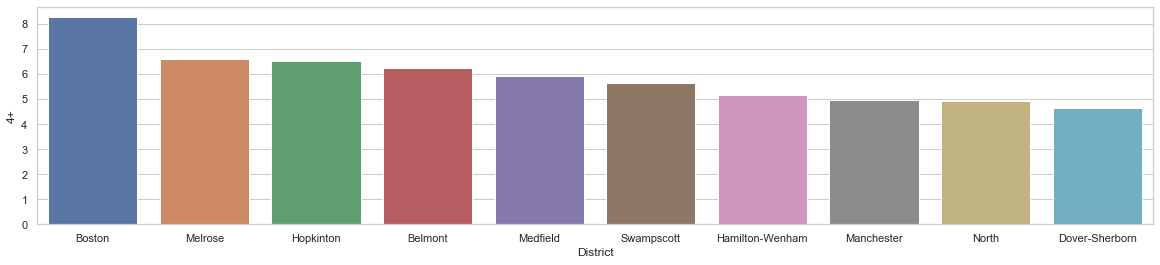

In [31]:
charted = charted.head(10)
sns.set(style="whitegrid")
plt.subplots(figsize=(20,4))
sns.barplot(x=xcolumn, y=chosen_column, data=charted)
plt.show()

In [63]:
for years in ['2014','2015','2016','2017']:
    sns.scatterplot(x="national_rank", y='3+', data=relatives['enrollment'+year])
    
plt.show()

# sns.scatterplot(x="national_rank", y='4+', data=charted)
# plt.show()

# sns.scatterplot(x="national_rank", y='5+', data=charted)
# plt.show()

ValueError: Could not interpret input 'national_rank'

C:\Users\elanr\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\elanr\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


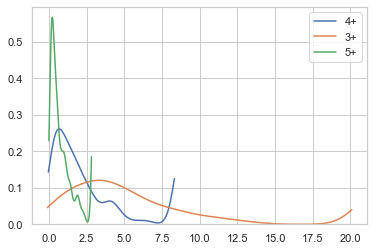

In [58]:
cut_number = .1
sns.kdeplot(charted['4+'], cut=cut_number)
sns.kdeplot(charted['3+'], cut=cut_number)
sns.kdeplot(charted['5+'], cut=cut_number)
plt.show()

3